In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#### EAD

In [2]:
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.PassengerId = df.to_string(columns=['PassengerId'])

In [5]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_copy = df
df_copy.Age.fillna(df.Age.mean(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)

In [8]:
corr = df_copy.corr()
corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


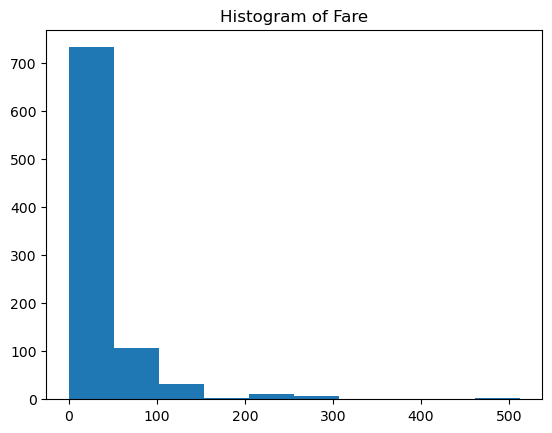

In [9]:
plt.hist(df.Fare)
plt.title('Histogram of Fare')
plt.show()

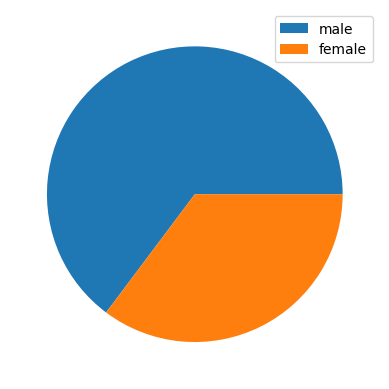

In [10]:
plt.pie(df_copy.Sex.value_counts());
plt.legend(df_copy.Sex.value_counts().index)

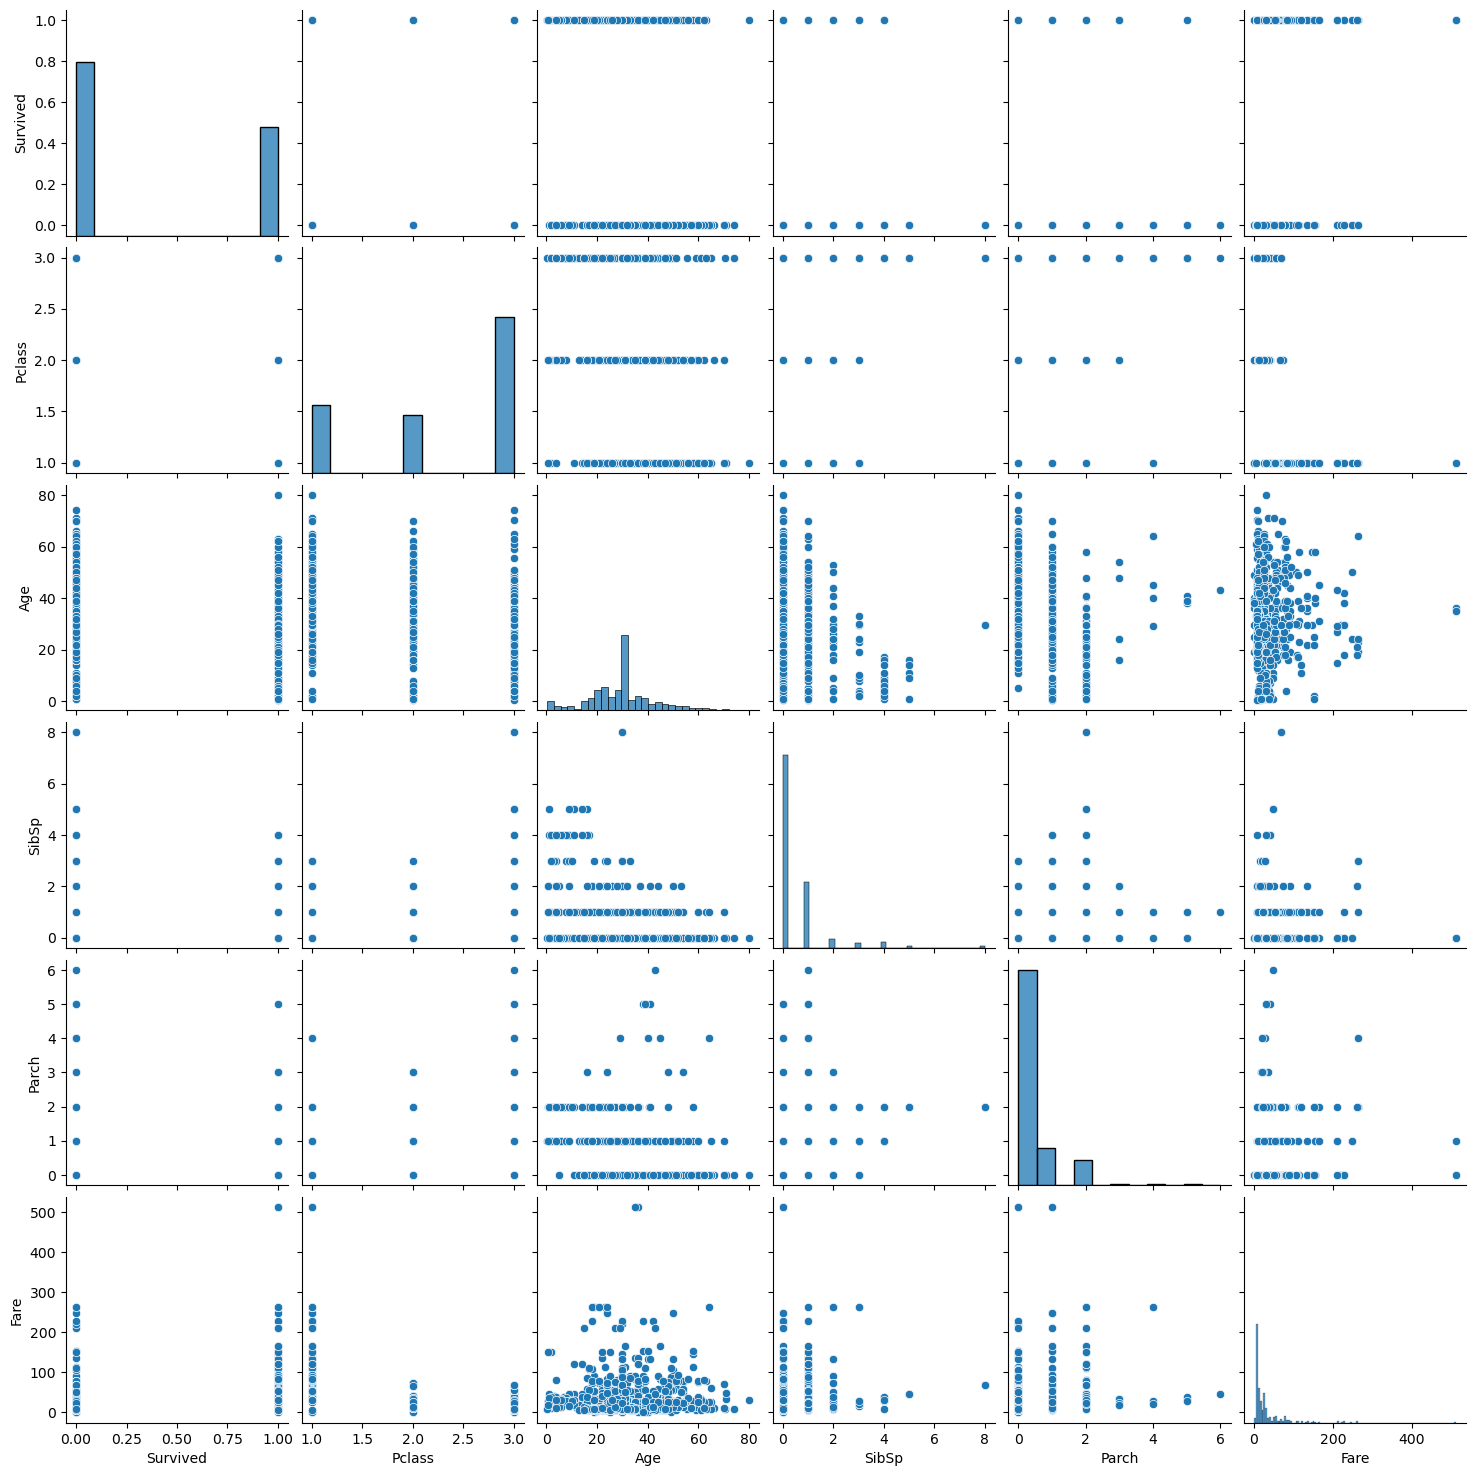

In [11]:
import seaborn as sns

sns.pairplot(df_copy)

In [12]:
df_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,PassengerId\n0 1\n1 ...,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,PassengerId\n0 1\n1 ...,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,PassengerId\n0 1\n1 ...,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,PassengerId\n0 1\n1 ...,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,PassengerId\n0 1\n1 ...,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,PassengerId\n0 1\n1 ...,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,PassengerId\n0 1\n1 ...,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,PassengerId\n0 1\n1 ...,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,PassengerId\n0 1\n1 ...,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


In [13]:
df_survived = df_copy.groupby(['Survived']).mean()
df_survived

,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,
0,2.531876,30.415100,0.553734,0.329690,22.117887
1,1.950292,28.549778,0.473684,0.464912,48.395408


C:\Users\yurid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


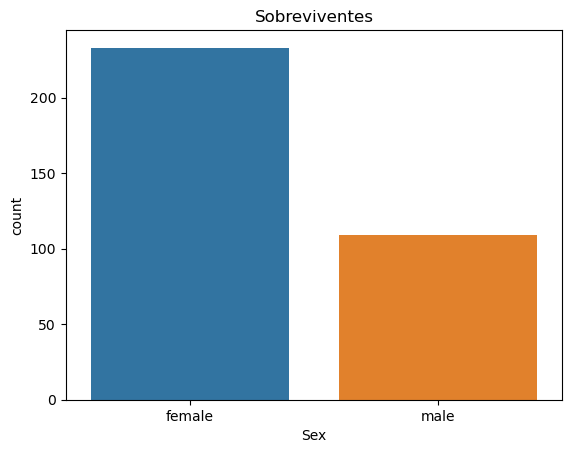

In [14]:
sobreviventes = df_copy.loc[df_copy['Survived'] == 1]
mortos = df_copy.loc[df_copy['Survived'] == 0]

plt.title("Sobreviventes")
sns.countplot(sobreviventes.Sex);

C:\Users\yurid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


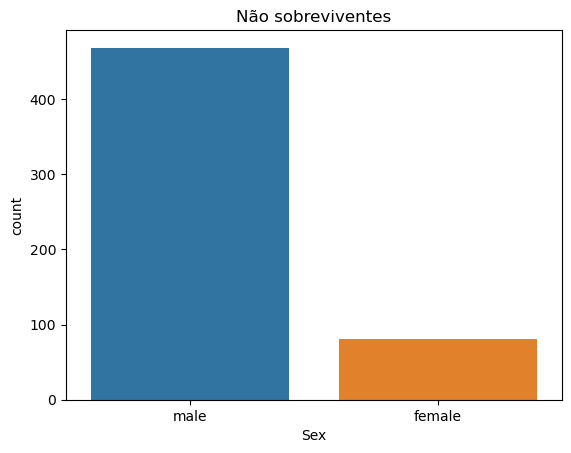

In [15]:
plt.title("Não sobreviventes")
sns.countplot(mortos.Sex);

In [16]:
df_copy.groupby(['Embarked']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,
C,0.553571,1.886905,30.562419,0.386905,0.363095,59.954144
Q,0.389610,2.909091,29.113724,0.428571,0.168831,13.276030
S,0.336957,2.350932,29.480855,0.571429,0.413043,27.079812


In [17]:
df_copy.groupby(['Sex']).mean()

,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,
female,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
male,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [18]:
df_kids = df_copy.loc[df_copy.Age <= 13]
len(df_kids)

71

In [19]:
print("Porcentagem de sobrevientes por tipo:\n")
print(f'total: {len(sobreviventes) / len(df_copy) * 100}')
print(f'mulheres: {len(sobreviventes.loc[sobreviventes.Sex == "female"]) / len(sobreviventes) * 100}')
print(f'homens: {len(sobreviventes.loc[sobreviventes.Sex == "male"]) / len(sobreviventes) * 100}')
print(f'crianças menores de 14 sobreviventes: {len(df_kids.loc[df_kids.Survived == 1]) / len(df_kids) * 100}')

Porcentagem de sobrevientes por tipo:

total: 38.38383838383838
mulheres: 68.12865497076024
homens: 31.871345029239766
crianças menores de 14 sobreviventes: 59.154929577464785


### Machine Learningdf_copy

In [21]:
df_copy['Sex'] = df_copy['Sex'].map(lambda x: 0 if(x == 'male') else 1)
df_copy['Embarked'] = df_copy['Embarked'].map(lambda x: 0 if(x == 'C') else(1 if(x == 'Q') else 2))

In [22]:
df_copy

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,PassengerId\n0 1\n1 ...,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,A/5 21171,7.2500,2
1,PassengerId\n0 1\n1 ...,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,PC 17599,71.2833,0
2,PassengerId\n0 1\n1 ...,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,STON/O2. 3101282,7.9250,2
3,PassengerId\n0 1\n1 ...,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,113803,53.1000,2
4,PassengerId\n0 1\n1 ...,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,373450,8.0500,2
...,...,...,...,...,...,...,...,...,...,...,...
886,PassengerId\n0 1\n1 ...,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,211536,13.0000,2
887,PassengerId\n0 1\n1 ...,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,112053,30.0000,2
888,PassengerId\n0 1\n1 ...,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,29.699118,1,2,W./C. 6607,23.4500,2
889,PassengerId\n0 1\n1 ...,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,111369,30.0000,0
